In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [13]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [14]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [15]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  200


In [16]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Dataset Preprocessing using ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
WIDTH=224
HEIGHT=224

In [19]:
image_generator = ImageDataGenerator(rescale=1/255,
                                    #horizontal_flip=True,
                                    #shear_range=0.2 ,
                                    #zoom_range=0.2,
                                    #rotation_range=45,
                                    #height_shift_range=0.5,
                                    #fill_mode='nearest',
                                    validation_split=0.2)   

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 760 images belonging to 4 classes.
Found 190 images belonging to 4 classes.


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

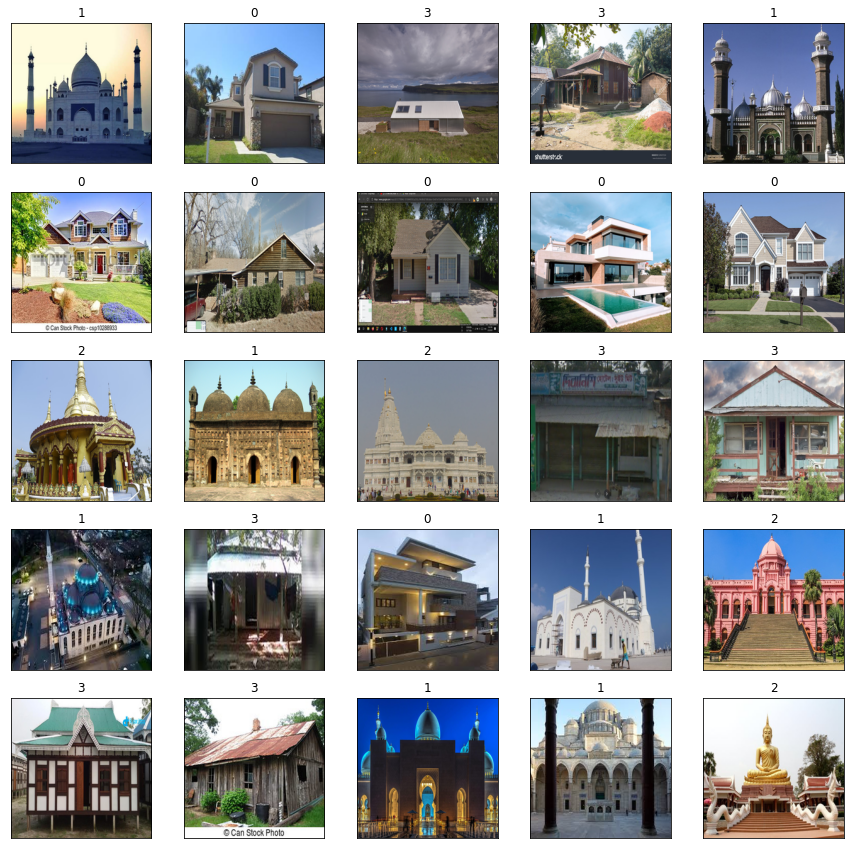

In [20]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Mobile Net v2

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
import tensorflow as tf

In [22]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False)

In [23]:
base_model.trainable = False

In [24]:
total_class

4

In [25]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## Compile the model

In [27]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [28]:
epochs=10
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

760
190
23
5


In [29]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
23/23 [==============================] - 19s 837ms/step - loss: 0.9171 - accuracy: 0.6511 - val_loss: 0.5041 - val_accuracy: 0.8750
Epoch 2/10
23/23 [==============================] - 19s 821ms/step - loss: 0.3796 - accuracy: 0.8860 - val_loss: 0.2837 - val_accuracy: 0.9062
Epoch 3/10
23/23 [==============================] - 18s 785ms/step - loss: 0.2607 - accuracy: 0.9121 - val_loss: 0.2663 - val_accuracy: 0.9125
Epoch 4/10
23/23 [==============================] - 18s 776ms/step - loss: 0.2119 - accuracy: 0.9286 - val_loss: 0.2268 - val_accuracy: 0.9000
Epoch 5/10
23/23 [==============================] - 18s 781ms/step - loss: 0.1786 - accuracy: 0.9396 - val_loss: 0.2542 - val_accuracy: 0.9062
Epoch 6/10
23/23 [==============================] - 18s 766ms/step - loss: 0.1532 - accuracy: 0.9588 - val_loss: 0.2476 - val_accuracy: 0.8875
Epoch 7/10
23/23 [==============================] - 18s 770ms/step - loss: 0.1336 - accuracy: 0.9629 - val_loss: 0.2134 - val_accuracy: 0.9250

## Plot Accuracy and Loss Graph

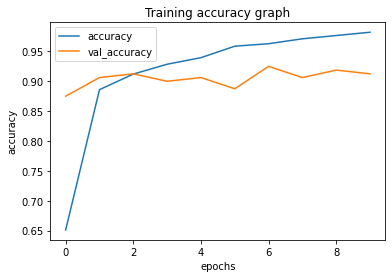

In [30]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

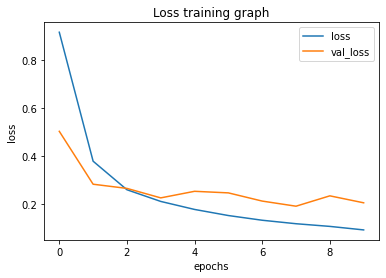

In [31]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [32]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

6/6 [==============================] - 4s 702ms/step - loss: 0.2264 - accuracy: 0.9000
Test Loss:  0.22641180455684662
Test Accuracy:  0.8999999761581421


In [33]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  89.99999761581421


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

In [34]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[2.1069348e-03 2.7719119e-05 6.3061503e-05 9.0542220e-05]]
0


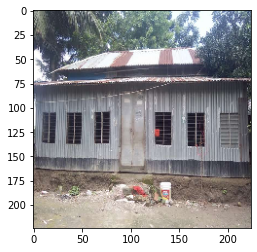

In [35]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.2685826e-03 5.0124526e-04 9.5285613e-05 7.0109963e-04]]
0


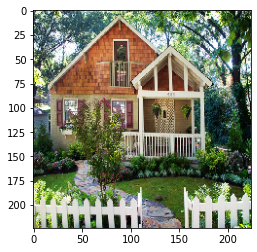

In [36]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.4356923e-03 1.6897917e-04 8.5838263e-05 7.5934055e-05]]
0


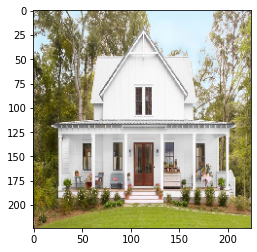

In [37]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[8.7833405e-04 4.5573361e-05 6.0397928e-05 4.7672416e-05]]
0


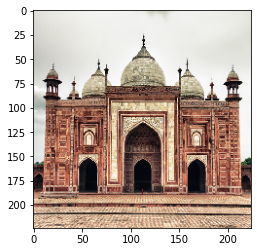

In [38]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [71]:
import time
t = time.time()

export_path_keras = "Saved Model/MobileNet_model_{}.h5".format(int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/MobileNet_model_1615632199.h5


## Reload the model h5 format

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model_path='Saved Model/MobileNet_model_1615629797.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


## Experiment with reload model h5 format

In [56]:
print(len(reload_model.weights))
print(reload_model.output_shape)

262
(None, 4)


## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [72]:
t = time.time()

export_path_sm = "Saved Model/TL MobileNetV2 {}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

Saved Model/TL MobileNetV2 1615632230
INFO:tensorflow:Assets written to: Saved Model/TL MobileNetV2 1615632230\assets


## Load SavedModel

In [62]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [68]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(mobilenetv2_1.00_224_input) at 0x1E39BA8FD00>

In [70]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1e3ad2b1490>